In [2]:
%pylab notebook
import sys, os, importlib
sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation')

import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, hts_fitting as hts, hts_dosecalculations as dose, seaborn as sns
from scipy.optimize import curve_fit

importlib.reload(dose)
#import hts_misc as misc
outputDirectory = '../figures/raw/'
parentDirectory = '/Users/alexisdevitre/Documents/GitHub/2024-Beam-On-Not/data/'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


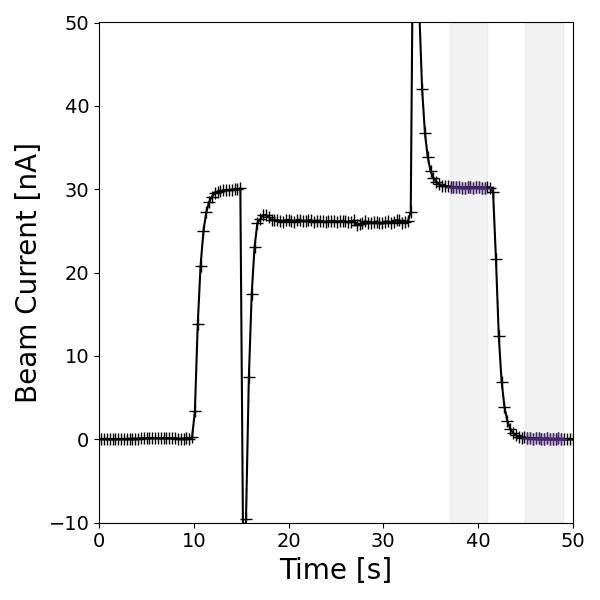

In [3]:
fig, ax = plt.subplots(figsize=(6, 6))
palette = sns.color_palette('viridis', 9)

ivpath = parentDirectory+'Ic/f37/'
#fpaths = [ivpath+f for f in sort(os.listdir(ivpath)) if (f != 'IcT') and (f[:2] == 'Ic') and (('nA' in f.split('-')[-2]) & (f.split('-')[-2] != '0nA'))]

ibdata = dose.loadBeamCurrent(ibpath=parentDirectory+'flux/f37.xlsx', sname='1200keV-step1')
ibdata['time_s'] -= 9580
ax.plot(ibdata.time_s, ibdata.ibeam_nA, marker='+', color='k')

for xmin, xmax in zip([37, 45], [41, 49]):
    ax.axvspan(xmin, xmax, color='k', alpha=.05)
    cut = (xmin < ibdata.time_s) & (ibdata.time_s < xmax)
    ax.plot(ibdata.time_s[cut], ibdata.ibeam_nA[cut], marker='+', color=palette[0], linestyle='None')

#ax.axvspan(37, 41, color='k', alpha=.05)
#cut = (37 < ibdata.time_s) & (ibdata.time_s < 41)
#ax.plot(ibdata.time_s[cut], ibdata.ibeam_nA[cut], marker='+', color='b', linestyle='None')

ax.set_ylabel('Beam Current [nA]')
ax.set_xlabel('Time [s]')
ax.set_xlim(0, 50)
ax.set_ylim(-10, 50)
fig.tight_layout()

plt.savefig(outputDirectory+'prototypical.svg')